---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
---


<!-- bart21mSlides2022Lec01-03 -->

# Introduction: Numerical Methods

This part deals with numerical implementations of optimization methods. The goal is to understand the implementation of optimization methods and to solve real-world problems numerically and efficiently. We will focus on the implementation of surrogate models, because they are the most efficient way to solve real-world problems.

Starting point is the well-established response surface methodology. It will be extended to the design and analysis of computer experiments (DACE). The DACE methodology is a modern extension of the response surface methodology. It is based on the use of surrogate models, which are used to replace the real-world problem with a simpler problem. The simpler problem is then solved numerically. The solution of the simpler problem is then used to solve the real-world problem.

::: {.callout-important}

### Numerical methods: Goals

* Understand implementation of optimization methods
* Solve real-world problems numerically and efficiently

:::

## Response Surface Methods: What is RSM? {#sec-rsm-intro}

Response Surface Methods (RSM) refer to a collection of statistical and mathematical tools that are valuable for developing, improving, and optimizing processes. The overarching theme of RSM involves studying how input variables that control a product or process can potentially influence a response that measures performance or quality characteristics. 

The advantages of RSM include a rich literature, well-established methods often used in manufacturing, the importance of careful experimental design combined with a well-understood model, and the potential to add significant value to scientific inquiry, process refinement, optimization, and more. However, there are also drawbacks to RSM, such as the use of simple and crude surrogates, the hands-on nature of the methods, and the limitation of local methods.

RSM is related to various fields, including Design of Experiments (DoE), quality management, reliability, and productivity. Its applications are widespread in industry and manufacturing, focusing on designing, developing, and formulating new products and improving existing ones, as well as from laboratory research. RSM is commonly applied in domains such as materials science, manufacturing, applied chemistry, climate science, and many others.

An example of RSM involves studying the relationship between a response variable, such as yield ($y$) in a chemical process, and two process variables: reaction time ($\xi_1$) and reaction temperature ($\xi_2$). The provided code illustrates this scenario, following a variation of the so-called "banana function."

In the context of visualization, RSM offers the choice between 3D plots and contour plots. In a 3D plot, the independent variables $\xi_1$ and $\xi_2$ are represented, with $y$ as the dependent variable.


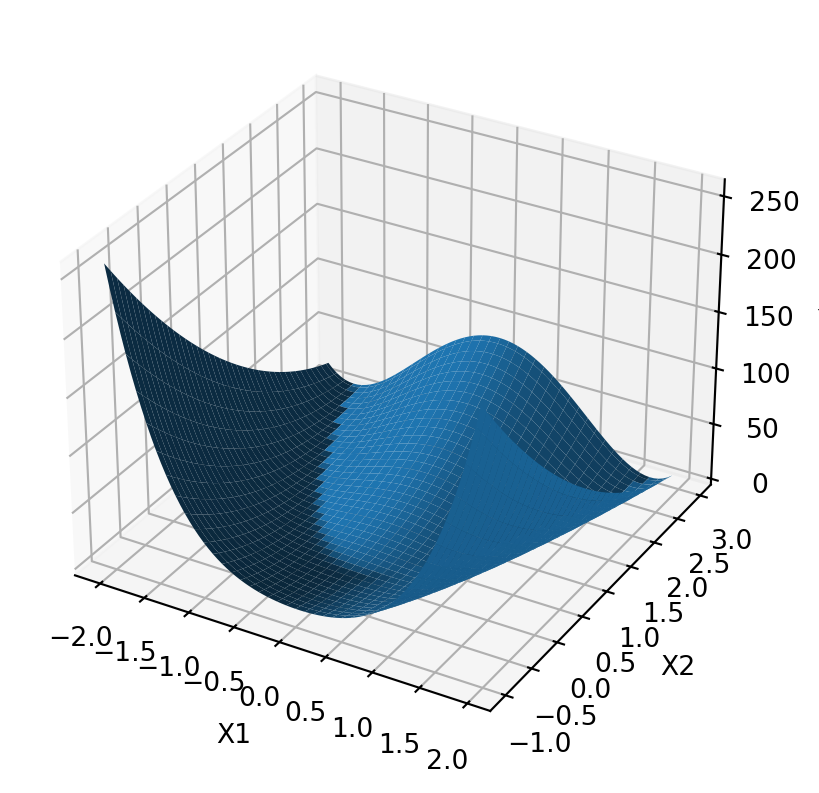

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fun_rosen(x1, x2):
    b = 10
    return (x1-1)**2 + b*(x2-x1**2)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(-2.0, 2.0, 0.05)
y = np.arange(-1.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun_rosen(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

- contour plot example: 
  - $x_1$ and $x_2$ are the independent variables
  - $y$ is the dependent variable


Text(0.5, 1.0, "Rosenbrock's Banana Function")

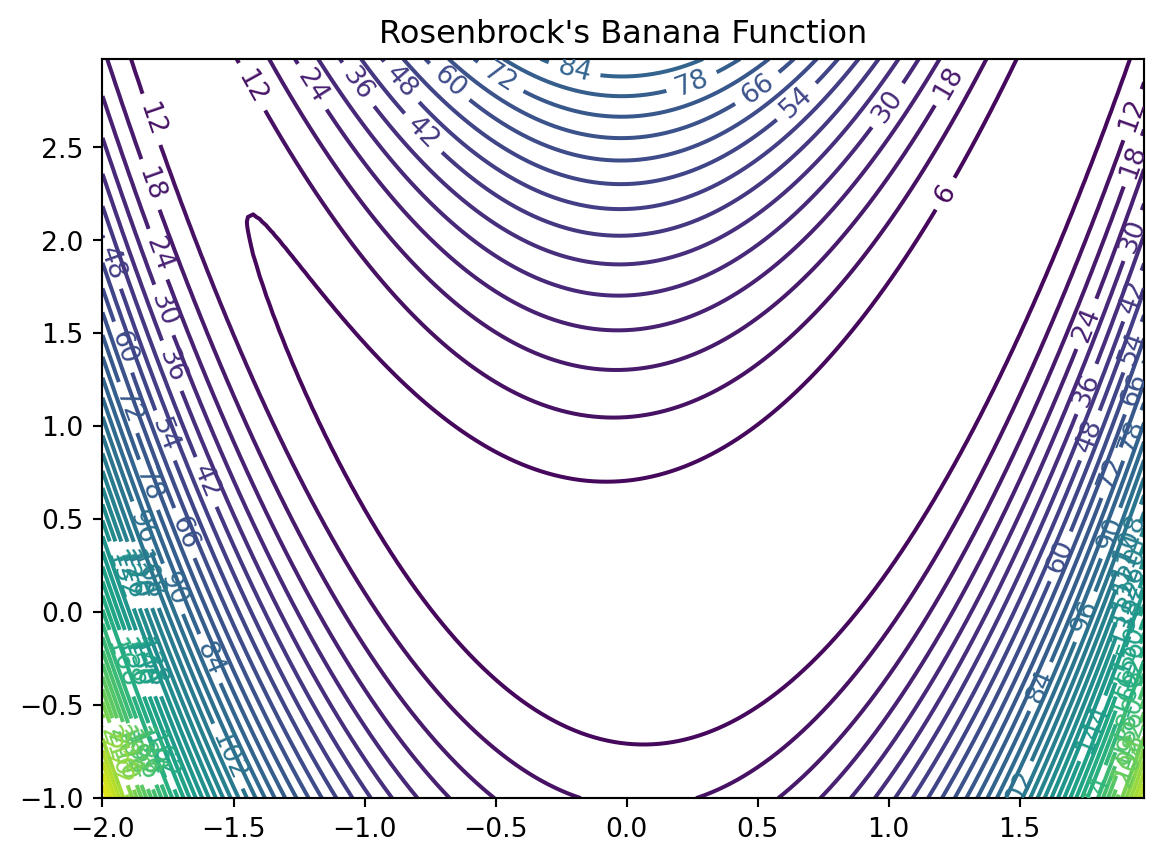

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-1.0, 3.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_rosen(X1, X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y , 50)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title("Rosenbrock's Banana Function")

- Visual inspection: yield is optimized near $(\xi_1. \xi_2)$


### Visualization: Problems in Practice

- True response surface is unknown in practice
- When yield evaluation is not as simple as a toy banana function, but a process requiring care to monitor, reconfigure and run, it's far too expensive to observe over a dense grid
- And, measuring yield may be a noisy/inexact process
- That's where stats (RSM) comes in


### RSM: Strategies

- RSMs consist of experimental strategies for
 - **exploring** the space of the process (i.e., independent/input) variables
(above $\xi_1$ and $\xi2)$ 
 - empirical statistical **modeling** targeted
toward development of an appropriate approximating relationship between
the response (yield) and process variables local to a study region of
interest 
- **optimization** methods for sequential refinement in search
of the levels or values of process variables that produce desirable
responses (e.g., that maximize yield or explain variation)

- RSM used for fitting an Empirical Model
- True response surface driven by an unknown physical mechanism
- Observations corrupted by noise 
- Helpful:  fit an empirical model to output collected under different process configurations
- Consider response $Y$ that depends on controllable input variables $\xi_1, \xi_2, \ldots, \xi_m$ 
- RSM: Equations of the  Empirical Model
  - $Y=f(\xi_1, \xi_2, \ldots, \xi_m) + \epsilon$
  - $\mathbb{E}\{Y\} = \eta = f(\xi1_1, \xi_2, \ldots, \xi_m)$
  - $\epsilon$ is treated as zero mean idiosyncratic noise possibly representing
    - inherent variation, or 
    - the effect of other systems or
    - variables not under our purview at this time 


### RSM: Noise in the Empirical Model 

- Typical simplifying assumption: $\epsilon \sim N(0,\sigma^2)$ 
- We seek estimates for $f$ and $\sigma^2$ from noisy observations $Y$ at inputs $\xi$

### RSM: Natural and Coded Variables

- Inputs $\xi_1, \xi_2, \ldots, \xi_m$  called **natural variables**:
  - expressed in natural units of measurement, e.g., degrees Celsius, pounds per square inch (psi), etc.
- Transformed to **coded variables** $x_1, x_2, \ldots, x_m$:
  - to mitigate hassles and confusion that can arise when working with a multitude of scales of measurement
- Typical **Transformations** offering dimensionless inputs $x_1, x_2, \ldots, x_m$ 
  - in the unit cube, or 
  - scaled to have a mean of zero and standard deviation of one, are common choices. 
- Empirical model becomes $\eta = f(x_1, x_2, \ldots, x_m)$


### RSM Low-order Polynomials

- Low-order polynomial make the following simplifying Assumptions
  - Learning about $f$ is lots easier if we make some simplifying approximations
  - Appealing to **Taylor's theorem**, a low-order polynomial in a small, localized region of the input ($x$) space is one way forward
  - Classical RSM: 
    - disciplined application of **local analysis** and 
    - **sequential refinement** of locality through conservative extrapolation
  - Inherently a **hands-on process**


## First-Order Models (Main Effects Model)

- **First-order model** (sometimes called main effects model) useful in parts of the input space where it's believed that there's little curvature in $f$:
$$\eta = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$
- For example: 
$$\eta = 50 + 8 x_1 + 3x_2$$
- In practice, such a surface would be obtained by fitting a model to the outcome of a designed experiment 
- First-Order Model in python Evaluated on a Grid
- Evaluate model on a grid in a double-unit square centered at the origin
- Coded units are chosen arbitrarily, although one can imagine deploying this approximating function nearby $x^{(0)} = (0,0)$


In [3]:
def fun_1(x1,x2):
    return 50 + 8*x1 + 3*x2

Text(0.5, 1.0, 'First Order Model: $50 + 8x_1 + 3x_2$')

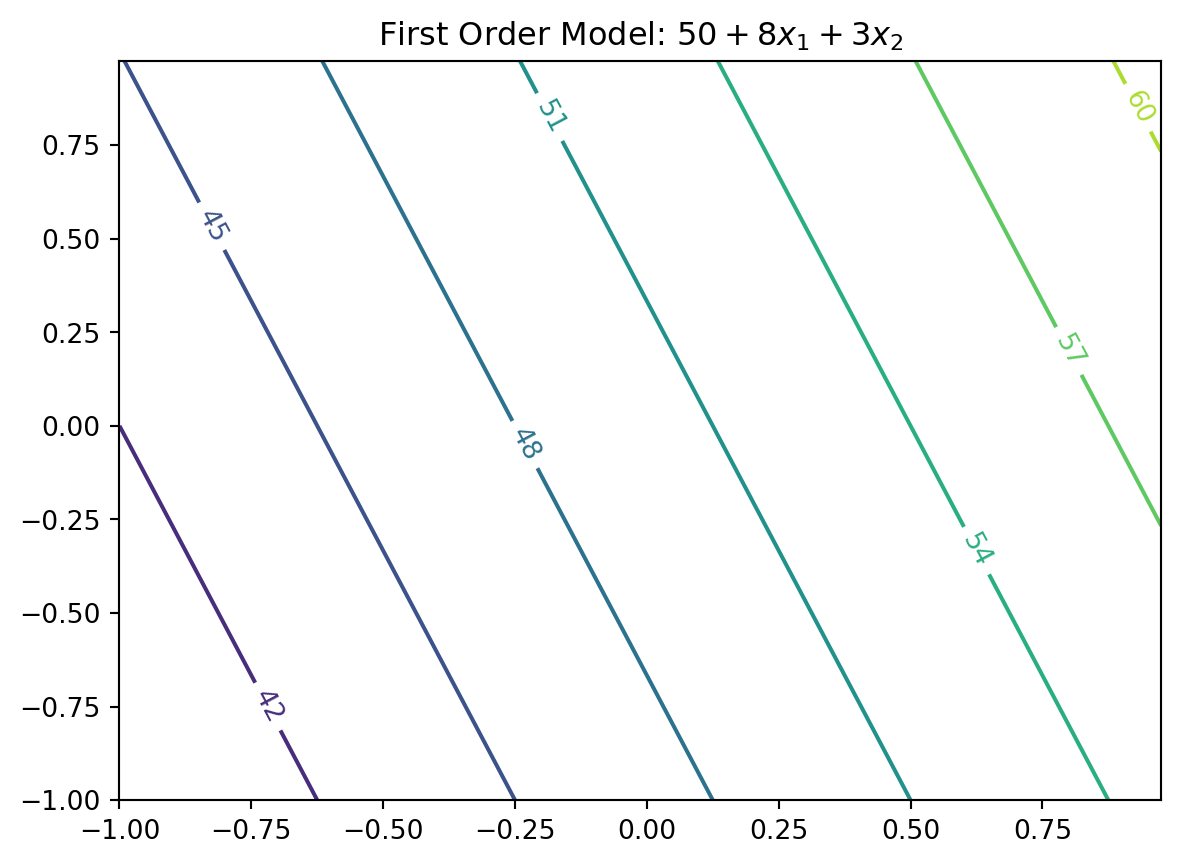

In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-1.0, 1.0, delta)
x2 = np.arange(-1.0, 1.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_1(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('First Order Model: $50 + 8x_1 + 3x_2$')

### First-Order Model Properties
 
- First-order model in 2d traces out a **plane** in $y \times (x_1, x_2)$ space
- Only be appropriate for the most trivial of response surfaces, even when applied in a highly localized part of the input space
- Adding **curvature** is key to most applications: 
  - First-order model with **interactions** induces limited degree of curvature via different rates of change of $y$ as $x_1$ is varied for fixed $x_2$, and vice versa:
$$\eta = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12} x_{12} $$
- For example 
$\eta = 50+8x_1+3x_2-4x_1x_2$

### First-order Model with Interactions in python 

- Code below facilitates evaluations for pairs $(x_1, x_2)$
- Responses may be observed over a mesh in the same double-unit square


In [5]:
def fun_11(x1,x2):
    return 50 + 8 * x1 + 3 * x2 - 4 * x1 * x2

Text(0.5, 1.0, 'First Order Model with Interactions')

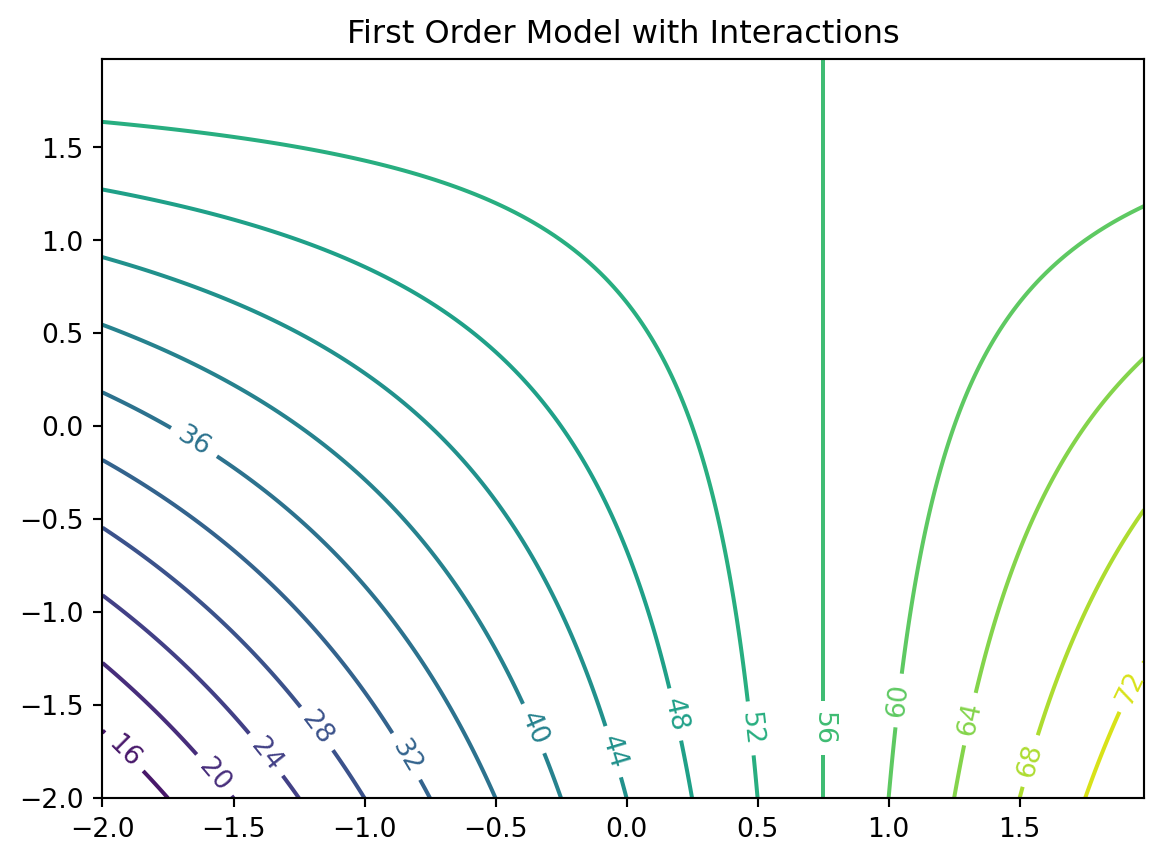

In [6]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_11(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y, 20)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('First Order Model with Interactions')

### Observations: First-Order Model with Interactions

- Mean response $\eta$ is increasing marginally in both $x_1$ and $x_2$, or conditional on a fixed value of the other until
$x_1$ is 0.75 
- Rate of increase slows as both coordinates grow simultaneously since the coefficient in front of the interaction term
$x_1 x_2$ is negative 
- Compared to the first-order model (without interactions): surface is far more useful locally
- Least squares regressions often flag up significant interactions when fit to data collected on a design far from local optima



## Second-Order Models

- Second-order model may be appropriate near local optima where $f$ would have substantial curvature:
$$\eta = \beta_0 + \beta_1 x_1 + \beta_2 x_2  + \beta_{11}x_1^2 + \beta_{22}x^2 + \beta_{12} x_1 x_2$$
- For example $$\eta = 50 + 8 x_1 + 3x_2 - 7x_1^2 - 3 x_2^2 - 4x_1x_2$$

* Implementation of the Second-Order Model as `fun_2()`. 


In [7]:
def fun_2(x1,x2):
    return 50 + 8 * x1 + 3 * x2 - 7 * x1**2 - 3*x2**2 - 4 * x1 * x2

Text(0.5, 1.0, 'Second Order Model with Interactions. Maximum near about $(0.6,0.2)$')

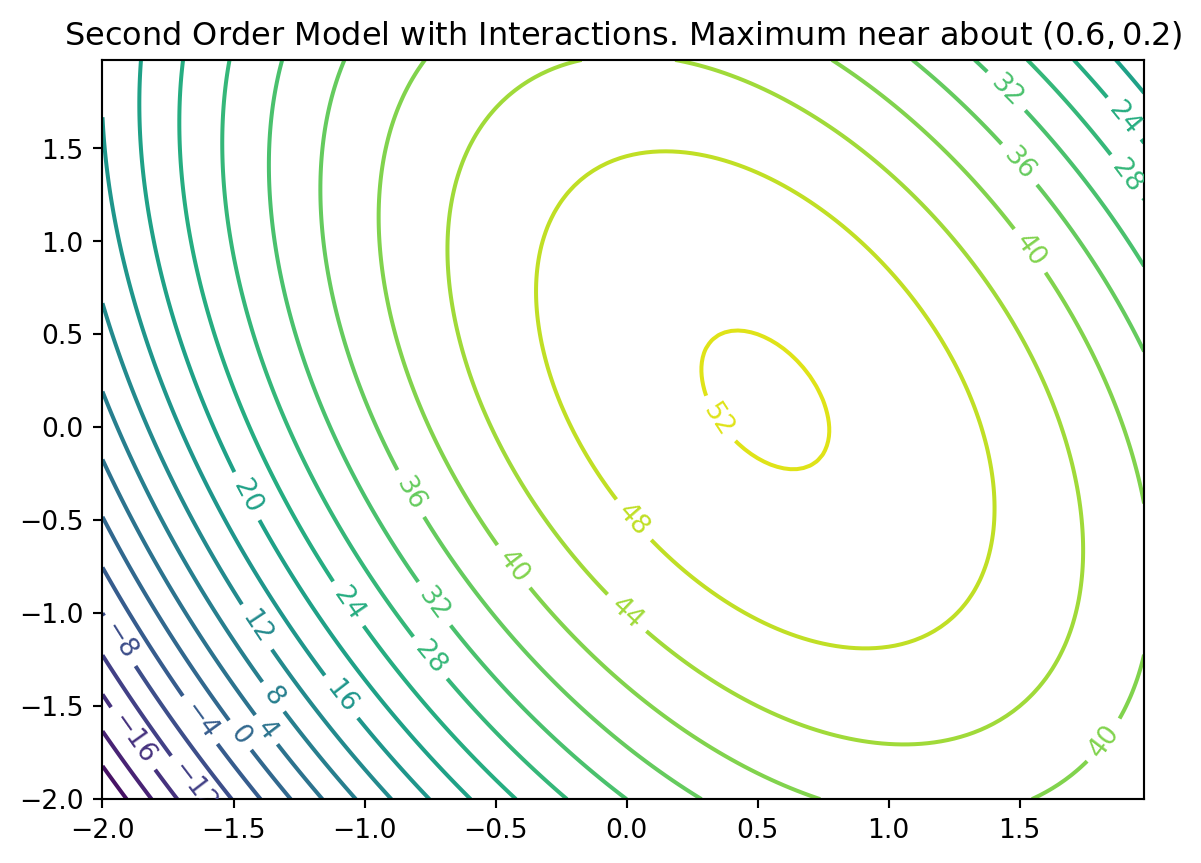

In [8]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_2(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y, 20)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Second Order Model with Interactions. Maximum near about $(0.6,0.2)$')

### Second-Order Models: Properties

- Not all second-order models would have a single stationary point (in RSM jargon called "a simple maximum") 
- In "yield maximizing" setting we're presuming response surface is **concave** down from a global viewpoint
  - even though local dynamics may be more nuanced
- Exact criteria depend upon the eigenvalues of a certain matrix built from those coefficients
- Box and Draper (2007) provide a diagram categorizing all of the kinds of second-order surfaces in RSM analysis, where finding local maxima is the goal


### Example: Stationary Ridge 

- Example set of coefficients describing what's called a **stationary ridge** is provided by the code below


In [9]:
def fun_ridge(x1, x2):
    return 80 + 4*x1 + 8*x2 - 3*x1**2 - 12*x2**2 - 12*x1*x2

Text(0.5, 1.0, 'Example of a stationary ridge')

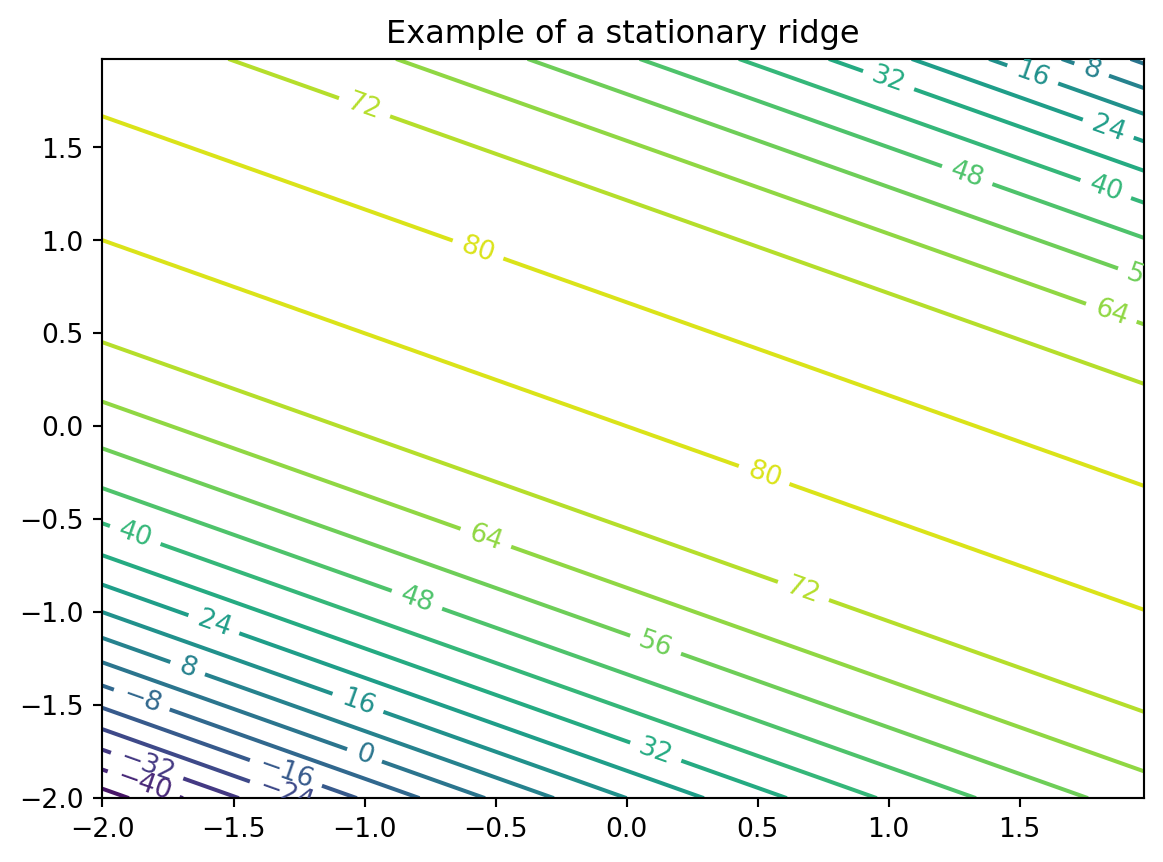

In [10]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_ridge(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y, 20)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Example of a stationary ridge')

### Observations: Second-Order Model (Ridge)

- **Ridge**: a whole line of stationary points corresponding to maxima
- Situation means that the practitioner has some flexibility when it comes to optimizing: 
  - can choose the precise setting of $(x_1, x_2)$ either arbitrarily or (more commonly) by
consulting some tertiary criteria

### Example: Rising Ridge

- An example of a rising ridge is implemented by the code below.


In [11]:
def fun_ridge_rise(x1, x2):
     return 80 - 4*x1 + 12*x2 - 3*x1**2 - 12*x2**2 - 12*x1*x2

Text(0.5, 1.0, 'Rising ridge: $\\eta = 80 + 4x_1 + 8x_2 - 3x_1^2 - 12x_2^2 - 12x_1x_2$')

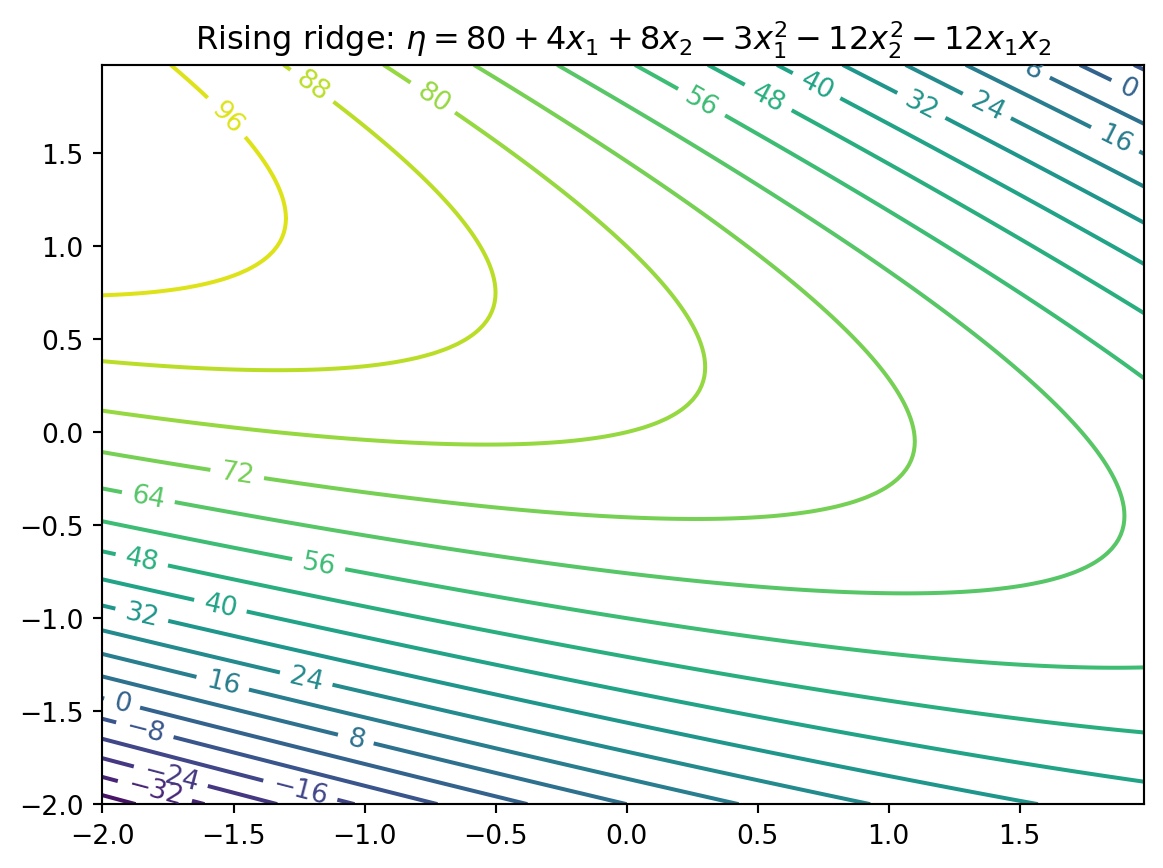

In [12]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_ridge_rise(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y, 20)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Rising ridge: $\\eta = 80 + 4x_1 + 8x_2 - 3x_1^2 - 12x_2^2 - 12x_1x_2$')

### Summary: Rising Ridge

- The stationary point is remote to the study region
- Ccontinuum of (local) stationary points along any line going through the 2d space, excepting one that
lies directly on the ridge
- Although estimated response will increase while moving along the axis of symmetry toward its stationary point, this situation indicates 
  - either a poor fit by the approximating second-order function, or 
  - that the study region is not yet precisely in the vicinity of a local optima---often both. 


### Falling Ridge

- Inversion of a rising ridge is a falling ridge
- Similarly indicating one is far from local optima, except that the response decreases as you move toward the
stationary point 
- Finding a falling ridge system can be a back-to-the-drawing-board affair.


### Saddle Point

- Finally, we can get what's called a saddle or minimax system. 


In [13]:
def fun_saddle(x1, x2):
    return 80 + 4*x1 + 8*x2 - 2*x2**2 - 12*x1*x2 

Text(0.5, 1.0, 'Saddle Point: $\\eta = 80 + 4x_1 + 8x_2 - 2x_2^2 - 12x_1x_2$')

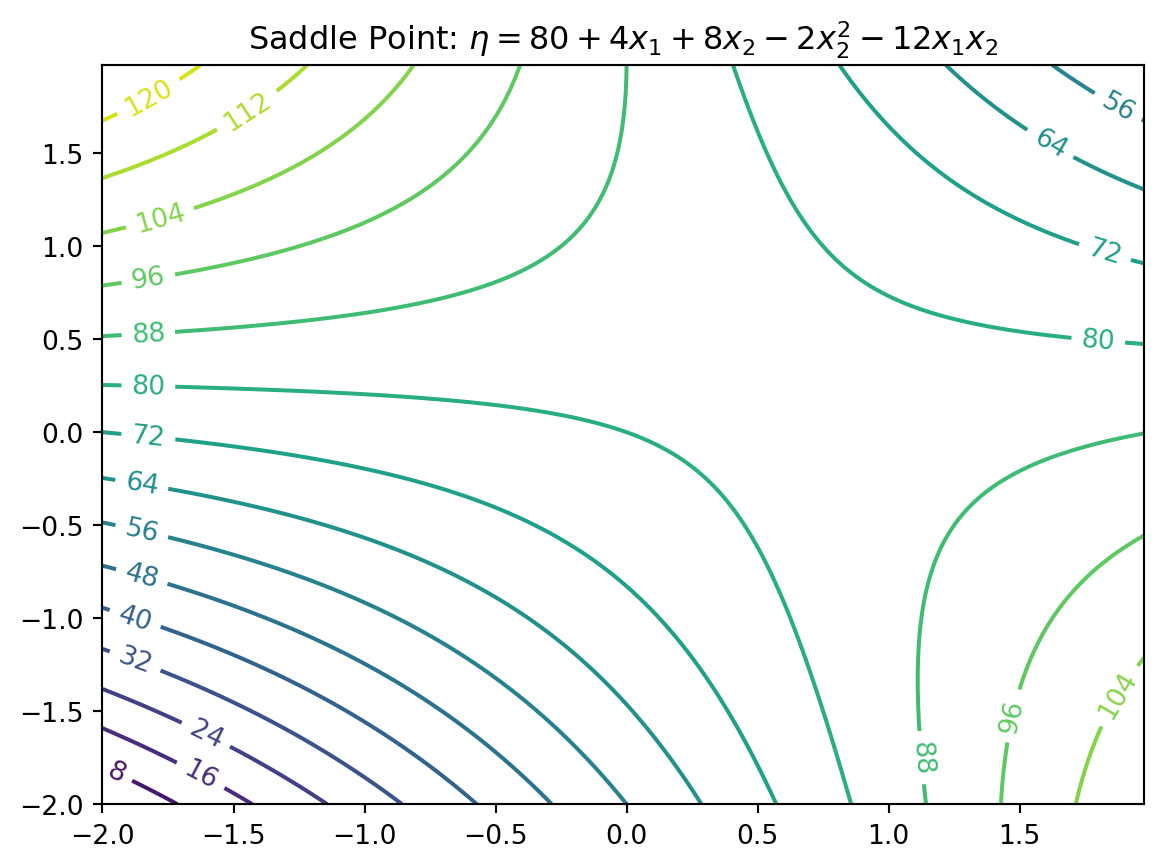

In [14]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
Y = fun_saddle(X1,X2)
fig, ax = plt.subplots()
CS = ax.contour(X1, X2, Y, 20)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Saddle Point: $\\eta = 80 + 4x_1 + 8x_2 - 2x_2^2 - 12x_1x_2$')

### Interpretation: Saddle Points

- Likely further data collection, and/or outside expertise, is needed before determining a course of action in this situation 

### Summary: Ridge Analysis

- Finding a simple maximum, or stationary ridge, represents ideals in the spectrum of second-order approximating functions
- But getting there can be a bit of a slog
- Using models fitted from data means uncertainty due to noise, and therefore uncertainty in the type of fitted second-order model
- A ridge analysis attempts to offer a principled approach to navigating uncertainties when one is seeking local maxima
- The two-dimensional setting exemplified above is convenient for visualization, but rare in practice
- Complications compound when studying the effect of more than two process variables

## General RSM Models

- General **first-order model** on $m$ process variables $x_1, x_2, \cdots, x_m$ is 
$$\eta = \beta_0 + \beta_1x_1 + \cdots + \beta_m x_m$$ 
- General **second-order model** on $m$ process variables
$$
\eta= \beta_0 + \sum_{j=1}^m + \sum_{j=1}^m x_j^2 + \sum_{j=2}^m \sum_{k=1}^j \beta_{kj}x_k x_j.
$$

### Ordinary Least Squares

- Inference from data is carried out by **ordinary least squares** (OLS)
- For an excellent review including R examples, see Sheather (2009)
- OLS and maximum likelihood estimators (MLEs) are in the typical Gaussian linear modeling setup basically equivalent


## General Linear Regression


We are considering a model, which can be written in the form

$$
Y = X \beta + \epsilon,
$$
where $Y$ is an $(n \times 1)$ vector of observations (responses), $X$ is an $(n \times p)$ matrix of known form, $\beta$ is a $(1 \times p)$ vector of unknown parameters, and $\epsilon$ is an $(n \times 1)$ vector of errors.
Furthermore, $E(\epsilon) = 0$, $Var(\epsilon) = \sigma^2 I$ and the $\epsilon_i$ are uncorrelated.

Using the normal equations
$$
(X'X)b = X'Y,
$$

the solution is given by

$$
b = (X'X)^{-1}X'Y.
$$



::: {#exm-ols}
### Linear Regression


[[0.  ]
 [0.79]
 [1.57]
 [2.36]
 [3.14]
 [3.93]
 [4.71]
 [5.5 ]]
[[ 0.  ]
 [ 0.71]
 [ 1.  ]
 [ 0.71]
 [ 0.  ]
 [-0.71]
 [-1.  ]
 [-0.71]]


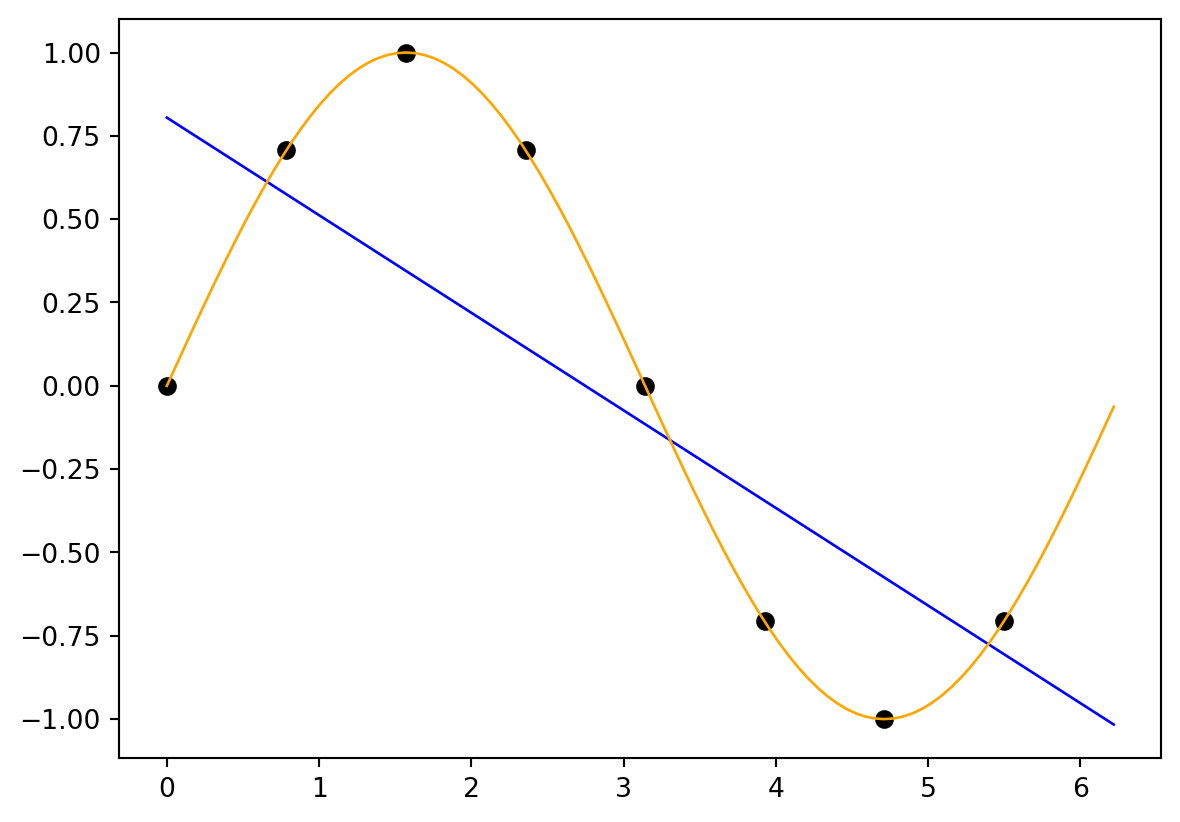

In [15]:
#| label: linreg-example
import numpy as np
n = 8
X = np.linspace(0, 2*np.pi, n, endpoint=False).reshape(-1,1)
print(np.round(X, 2))
y = np.sin(X)
print(np.round(y, 2))
# fit an OLS model to the data, predict the response based on the 1ßß x values
m = 100
x = np.linspace(0, 2*np.pi, m, endpoint=False).reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(x)
# visualize the data and the fitted model
import matplotlib.pyplot as plt
plt.scatter(X, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=1)
# add the ground truth (sine function) in orange
plt.plot(x, np.sin(x), color='orange', linewidth=1)
plt.show()

:::


## Designs

- Important: Organize the data collection phase of a response surface study carefully
- **Design**: choice of $x$'s where we plan to observe  $y$'s, for the purpose of approximating $f$
- Analyses and designs need to be carefully matched
- When using a first-order model, some designs are preferred over others
- When using a second-order model to capture curvature, a different sort of design is appropriate
- Design choices often contain features enabling modeling assumptions to be challenged
  - e.g., to check if initial impressions are supported by the data ultimately collected

### Different Designs

- **Screening desings**:  determine which variables matter so that subsequent experiments may be smaller and/or more focused
- Then there are designs tailored to the form of model (first- or second-order, say) in the screened variables
- And then there are more designs still

## RSM Experimentation

### First Step

- RSM-based experimentation begins with a **first-order model**, possibly with interactions
- Presumption: current process operating **far from optimal** conditions
- Collect data and apply **method of steepest ascent** (gradient) on fitted surfaces to move to the optimum


### Second Step

- Eventually, if all goes well after several such carefully iterated refinements, **second-order models** are used on
appropriate designs in order to zero-in on ideal operating conditions
- Careful analysis of the fitted surface:
  - Ridge analysis with further refinement using gradients of, and
  - standard errors associated with, the fitted surfaces, and so on 
 

### Third Step 

- Once the practitioner is satisfied with the full arc of
  - design(s), 
  - fit(s), and
  - decision(s):
- A small experiment called  **confirmation test** may be performed to check if the predicted optimal settings are 
realizable in practice


## RSM: Review and General Considerations

- First Glimpse, RSM seems sensible, and pretty straightforward as quantitative statistics-based analysis goes
- But: RSM can get complicated, especially when input dimensions are not very low
- Design considerations are particularly nuanced, since the goal is to obtain reliable estimates of
main effects, interaction, and curvature while minimizing sampling effort/expense

- RSM Downside: Inefficiency
  - Despite intuitive appeal, several RSM downsides become apparent upon reflection
  - Problems in practice 
  - Stepwise nature of sequential decision making is inefficient:
    - Not obvious how to re-use or update analysis from earlier phases, or couple with data from other sources/related experiments

- RSM Downside: Locality
  - In addition to being local in experiment-time (stepwise approach),  it's local in experiment-space
  - Balance between 
    - exploration (maybe we're barking up the wrong tree) and 
    - exploitation (let's make things a little better) is modest at best

- RSM Downside: Expert Knowledge
  - Interjection of expert knowledge is limited to hunches about relevant variables (i.e., the screening phase), where to initialize search, how to design the experiments 
  - Yet at the same time classical RSMs rely heavily on constant examination throughout stages of modeling and design
  and on the instincts of seasoned practitioners

- RSM Downside: Replicability
  - Parallel analyses, conducted according to the same best intentions, rarely lead to the same designs, model fits and so on 
  - Sometimes that means they lead to different conclusions, which can be cause for concern

### Historical Considerations about RSM

- In spite of those criticisms, however, there was historically little impetus to revise the status quo
- Classical RSM was comfortable in its skin, consistently led to improvements or compelling evidence that none
can reasonably be expected
- But then in the late 20th century came an explosive expansion in computational capability, and with it a means of
addressing many of those downsides

### Status Quo

- Nowadays, field experiments and statistical models, designs and optimizations are coupled with  with mathematical models 
- Simple equations are not regarded as sufficient to describe real-world systems anymore
- Physicists figured that out fifty years ago; industrial engineers followed, biologists, social scientists, climate scientists and weather forecasters, etc.
- Systems of equations are required, solved over meshes (e.g., finite elements), or stochastically interacting agents 
- Goals for those simulation experiments are as diverse as their underlying dynamics
- Optimization of systems is common, e.g., to identify worst-case scenarios

### The Role of Statistics 

- Solving systems of equations, or interacting agents, requires computing
- Statistics involved at various stages: 
  - choosing the mathematical model
  - solving by stochastic simulation (Monte Carlo)
  - designing the computer experiment
  - smoothing over idiosyncrasies or noise
  - finding optimal conditions, or 
  - calibrating mathematical/computer models to data from field experiments


### New RSM is needed: DACE

- Classical RSMs are not well-suited to any of those tasks, because
  - they lack the fidelity required to model these data 
  - their intended application is too local
  - they're also too hands-on. 
- Once computers are involved, a natural inclination is to automate---to remove humans from the loop and set the computer running on the analysis in order to maximize computing throughput, or minimize idle time
- **Design and Analysis of Computer Experiments** as a modern extension of RSM
- Experimentation is changing due to  advances in machine learning
- **Gaussian process** (GP) regression is the canonical surrogate model
- Origins in geostatistics (gold mining)
- Wide applicability in contexts where prediction is king 
- Machine learners exposed GPs as powerful predictors for all sorts of tasks:
 - from regression to classification, 
 - active learning/sequential design,
 - reinforcement learning and optimization, 
 - latent variable modeling, and so on


## Exercises

1. Generate 3d Plots for the Contour Plots in this notebook.
2. Write a `plot_3d` function, that takes the objective function `fun` as an argument.
  * It should provide the following interface: `plot_3d(fun)`.
3. Write a `plot_contour` function, that takes the objective function `fun` as an argument:
  * It should provide the following interface: `plot_contour(fun)`.
4. Consider further arguments that might be useful for both function, e.g., ranges, size, etc.



## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this lecture is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/005_num_rsm.ipynb)

:::